
# IND320 – Project Work Part 1: Dashboard basics

**Student:** _Majed Almnety_

## Links
- **GitHub Repo:** _https://github.com/MajedAlmnety/IND320-Project-Part1.git_
- **Streamlit App:** _https://ind320-project-part1-mvjrbnbyefycsijdcn3im4.streamlit.app/_




In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# General settings for plots
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.grid'] = True



In [37]:
csv_path = '../app/open-meteo-subset.csv'

In [38]:
df = pd.read_csv(csv_path)

In [39]:
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


In [40]:
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        time_col = col
        break
    except Exception:
        time_col = None

df.shape


(8760, 6)

In [41]:
display(df.info())
display(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


None

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2020-07-01 11:30:00,-0.394909,0.222854,3.661689,8.300719,212.209589
min,2020-01-01 00:00:00,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,2020-04-01 05:45:00,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,2020-07-01 11:30:00,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,2020-09-30 17:15:00,4.100000,0.200000,5.100000,11.500000,292.000000
max,2020-12-30 23:00:00,19.900000,5.800000,13.600000,28.700000,360.000000
std,NaN,6.711903,0.493747,2.253210,5.098909,91.371980


## Plot each column separately

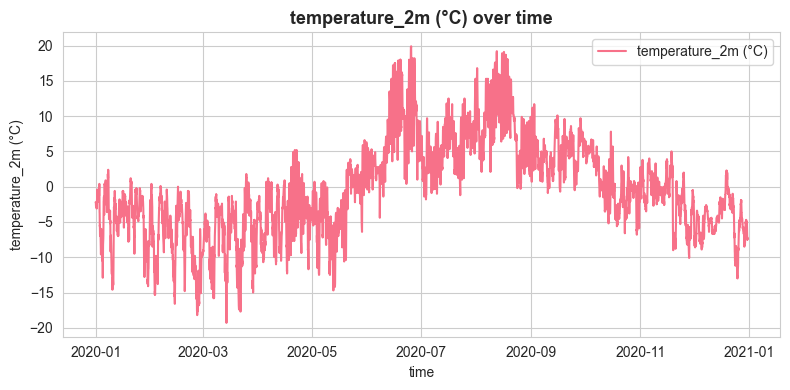

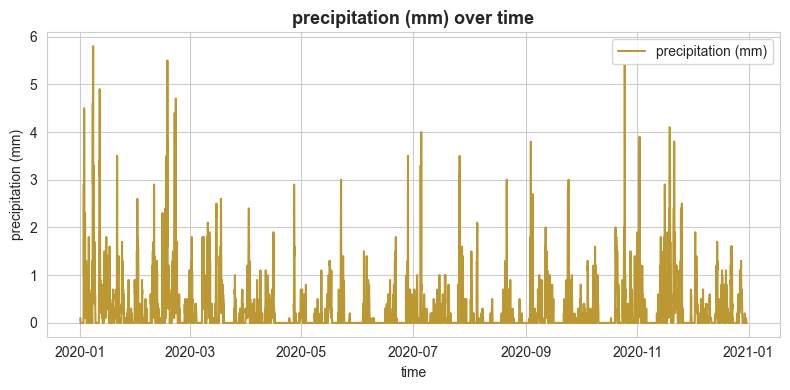

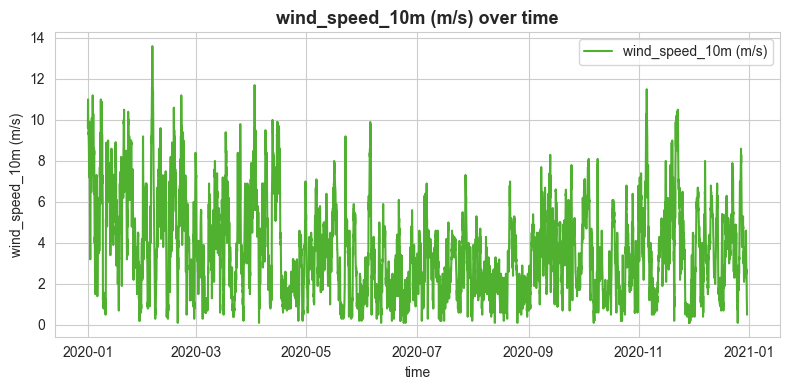

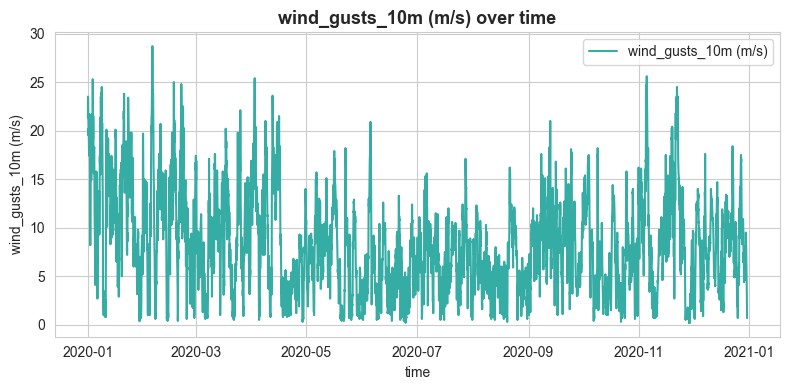

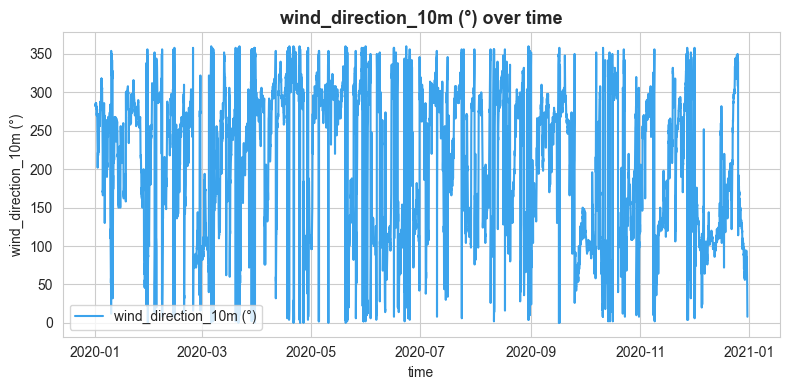

In [42]:
# Use Seaborn style
sns.set_style("whitegrid")

# Define the time column (first column in the dataframe)
time_col = df.columns[0]

# Select numeric columns (exclude the time column)
num_cols = [c for c in df.columns if (df[c].dtype.kind in 'if') and (c != time_col)]

# Loop through each numeric column and plot
for i, c in enumerate(num_cols):
    plt.figure(figsize=(8, 4))

    # Plot with a different color for each column
    sns.lineplot(x=df[time_col], y=df[c], label=c, color=sns.color_palette("husl")[i])

    # Chart settings
    plt.xlabel(time_col)
    plt.ylabel(c)
    plt.title(f"{c} over time", fontsize=13, weight="bold")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Visualization Plan and Steps

In this section, we will:
- Resample the data (weekly, monthly, or other frequency).
- Aggregate using mean, sum, or median.
- Optionally apply rolling smoothing for clarity.
- Plot each numeric column separately over time.



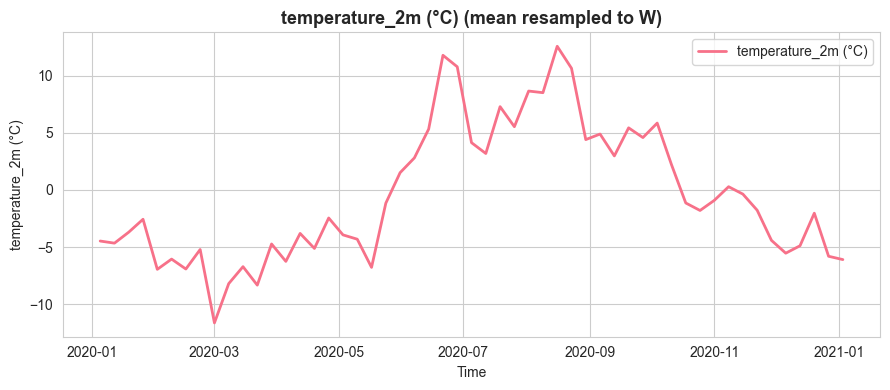

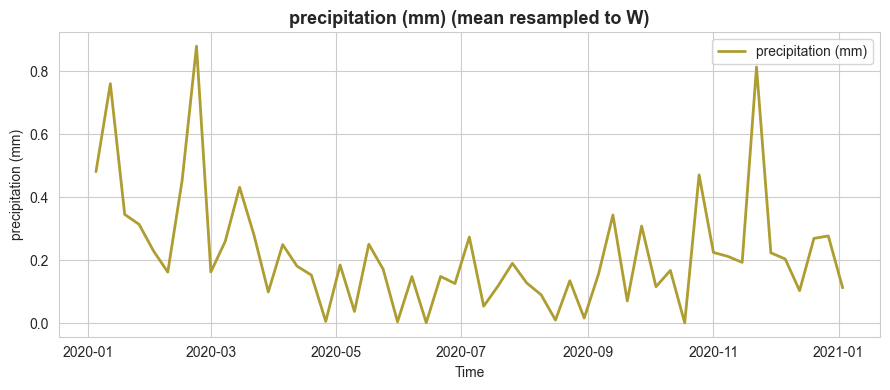

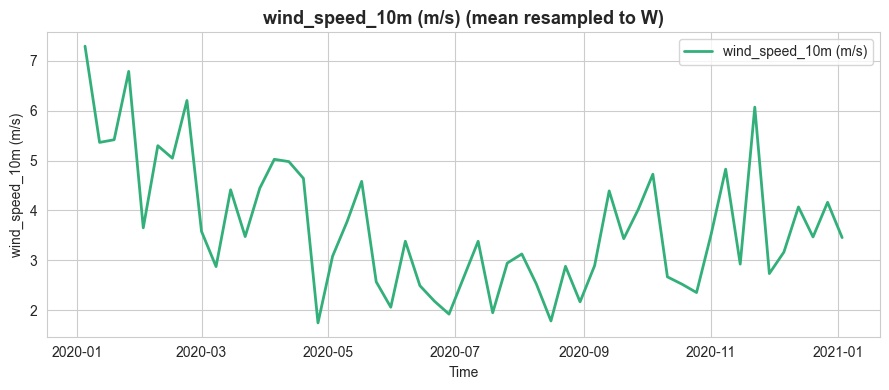

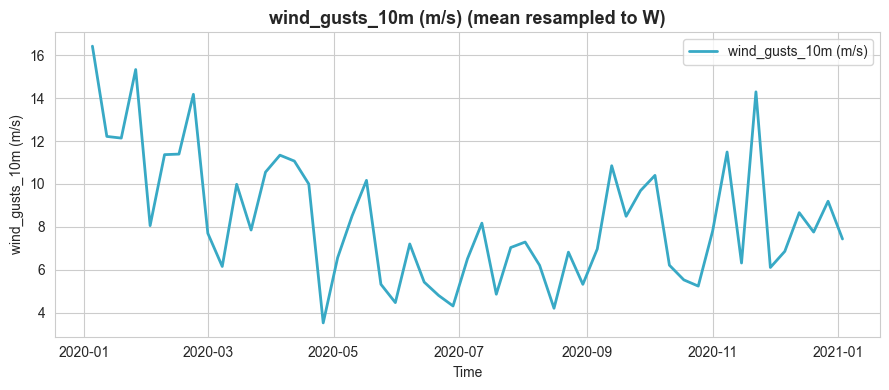

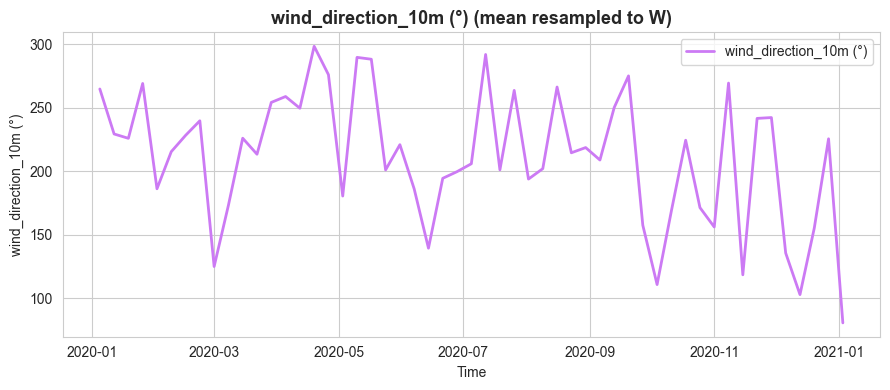

In [43]:

# ---------------- Settings ----------------
freq = "W"          # "W" weekly, "M" monthly, "Q" quarterly, "D" daily
agg = "mean"        # aggregation: "mean", "sum", "median", ...
rolling_window = 0  # e.g. 4 for smoothing, 0 = off
# ------------------------------------------

sns.set_style("whitegrid")

# Assume first column is time
time_col = df.columns[0]

# Ensure time column is datetime
if not np.issubdtype(df[time_col].dtype, np.datetime64):
    df[time_col] = pd.to_datetime(df[time_col], errors="coerce")

# Numeric columns (exclude time)
num_cols = [c for c in df.columns if (df[c].dtype.kind in "if") and (c != time_col)]
if not num_cols:
    raise ValueError("No numeric columns found aside from the time column.")

# Resample with chosen frequency + aggregation
resampled = df.set_index(time_col)[num_cols].sort_index().resample(freq)

if agg == "mean":
    resampled = resampled.mean()
elif agg == "sum":
    resampled = resampled.sum()
elif agg == "median":
    resampled = resampled.median()
else:
    resampled = resampled.mean()

# Optional smoothing
if rolling_window and rolling_window > 1:
    resampled = resampled.rolling(rolling_window, min_periods=1).mean()

# -------- Plot each column separately with different color --------
palette = sns.color_palette("husl", len(num_cols))

for i, c in enumerate(num_cols):
    plt.figure(figsize=(9, 4))

    sns.lineplot(x=resampled.index, y=resampled[c],
                  linewidth=2,
                 color=palette[i], label=c)

    plt.title(f"{c} ({agg} resampled to {freq})", fontsize=13, weight="bold")
    plt.xlabel("Time")
    plt.ylabel(c)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Plot all columns together.
In this step, we will:
- Resample the data (weekly, monthly, etc.) to reduce noise.
- Aggregate the values (mean, sum, or median).
- Optionally smooth the series using a rolling window.
- Plot **all numeric columns on the same chart** with different colors.
- Use a legend to distinguish between columns.


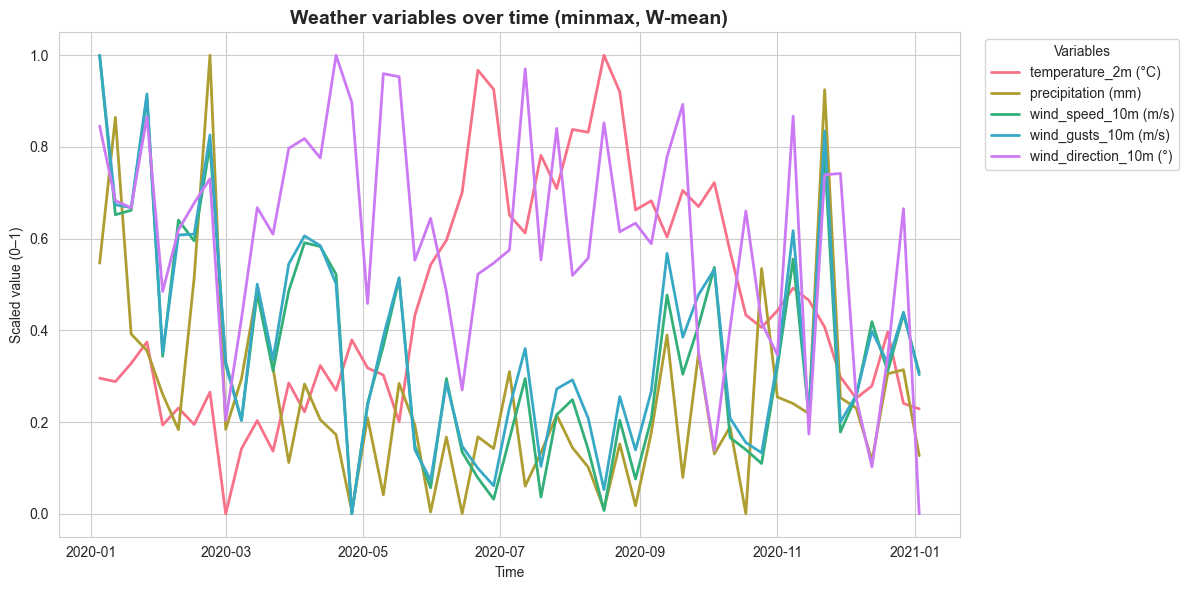

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Settings ----------------
scale = "minmax"    # try "zscore", "minmax", or None
freq = "W"          # "W"=weekly, "M"=monthly, "D"=daily
agg = "mean"        # aggregation: "mean", "sum", "median"
# ------------------------------------------

sns.set_style("whitegrid")

# Parse datetime for the time column
df["time"] = pd.to_datetime(df["time"])

# Numeric columns (everything except 'time')
num_cols = [c for c in df.columns if c != "time"]

# Resample data (weekly/monthly etc.)
resampled = (
    df.set_index("time")[num_cols]
    .resample(freq)
    .agg(agg)
)

# Scale data
scaled = resampled.copy()
if scale == "zscore":
    scaled = (resampled - resampled.mean()) / resampled.std(ddof=0)
    y_label = "Standardized value (z-score)"
elif scale == "minmax":
    scaled = (resampled - resampled.min()) / (resampled.max() - resampled.min())
    y_label = "Scaled value (0–1)"
else:
    y_label = "Original value"

# Plot all numeric columns together
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(num_cols))

for i, col in enumerate(num_cols):
    sns.lineplot(x=scaled.index, y=scaled[col], label=col, linewidth=2, color=palette[i])

plt.title(f"Weather variables over time ({scale}, {freq}-{agg})", fontsize=14, weight="bold")
plt.xlabel("Time")
plt.ylabel(y_label)
plt.legend(title="Variables", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Development Log: Jupyter Notebook and Streamlit App
I started this part of the project by opening Jupyter Notebook on my computer. My idea was to use it as a place to test code and document my steps. The first task was loading the dataset `open-meteo-subset.csv` with pandas. I had to figure out which column was the time column, and after trying different names I was able to convert it into a proper datetime. I then checked the numeric columns and displayed the first few rows to make sure everything looked correct.

Next, I did a quick exploration of the data using `info()` and `describe()`. This gave me useful details about the number of values, the averages, and the minimum and maximum for each numeric column. It felt like an important step before making any plots.

For visualization, I first plotted each numeric column separately against the time column. This helped me see clear trends in the variables. To make comparisons easier, I then created a combined chart where all numeric columns were normalized between 0 and 1. With this scaling, I could see the patterns across all variables on the same axis without being distracted by differences in units or scales.

After finishing the Notebook, I built the Streamlit app. I structured it into four pages: a front page with an introduction and links, a table page with small sparklines for each variable, a plots page where you can choose one or all columns and a time range, and an extras page for experiments like buttons and simple additional charts. I also added caching to make the app run faster.

One challenge I faced was file paths. Since the app pages are inside the `pages` folder while the CSV is in the `app` folder, I used `pathlib.Path(__file__).parent.parent` to reach the correct location. This way the app worked both locally and on Streamlit Cloud.

The last step was uploading everything to GitHub and linking it with Streamlit Cloud. I checked that the `requirements.txt` file included the necessary libraries. After pushing, the app deployed online successfully, which felt rewarding.
## AI Usage
I also tried using AI tools to help me write some parts of the code and to fix small issues. They saved me some time, but I always tested and adjusted the code myself. Overall, I learned how to connect Notebook analysis with an interactive Streamlit app, and I saw the importance of comments, documentation.

 I also used AI tools to help me write Git commands and to fix errors when pushing my project to GitHub. This made the workflow faster and easier to manage, but I always checked the steps myself.


